In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv('../input/calcifications.csv')

# Utilities

In [3]:
def prs_both(left, right):
    """
    True if either left or right has type 6 calcification (positive rim sign)
    """
    return "yes" if (left == "Type6" or right == "Type6") else "no"

def prs(calc_type):
    """
    True if either left or right has type 6 calcification (positive rim sign)
    """
    return "yes" if calc_type == "Type6" else "no"

def calc(left, right):
    """
    True if either left or right carotid artery has some type of calcification
    """
    return "no" if left == "Type1" and right == "Type1" else "yes"

def calc_and_lipids(left, right, lipids):
    """
    True if either left or right carotid artery has some type of calcification
    """
    return "yes" if (left not in  ["Type1", "Type2"] or right not in ["Type1", "Type2"]) and lipids == 'yes' else "no"

def at_least_5_and_high_stenosis_both(calc_left, calc_right, sten_left, sten_right):
    """True if calcification type in both sides is at least 4 and stenosis is at least 70 on the left
    and 70 on the right (35 left and 25 right before)
    """
    return "yes" if ((calc_left in ["Type5", "Type6"] and sten_left >= 70) or 
                 (calc_right in ["Type5", "Type6"] and sten_right >= 70)) else "no"

def at_least_5_and_high_stenosis(calc_type, stenosis):
    return "yes" if (calc_type in ["Type5", "Type6"] and stenosis >= 70) else "no"

def stenosis_risk_strat(stenosis):
    if stenosis < 50:
        return "low"
    elif stenosis >= 50 and stenosis < 70:
        return "medium"
    elif stenosis >= 70:
        return "high"

# Training Set

In [3]:
train = df.copy()

In [10]:
train["prs_either"] = train.apply(lambda x: prs_both(x['calcification_type_left'], 
                                                     x['calcification_type_right']), axis=1)
#train["prs_either"] = train["prs_either"].astype("category")
#train["prs_left"] = train.apply(lambda x: prs(x['calcification_type_left']), axis=1)
#train["prs_right"] = train.apply(lambda x: prs(x['calcification_type_right']), axis=1)

In [11]:
train['calc_and_lipids'] = train.apply(lambda x: calc_and_lipids(x['calcification_type_left'], 
                                                    x['calcification_type_right'], 
                                                    x['hyperlipidemia']), axis=1)

In [12]:
train['at_least_5_and_stenosis_either'] = train.apply(lambda x: at_least_5_and_high_stenosis_both(x['calcification_type_left'], 
                                                 x['calcification_type_right'],
                                                 x['stenosis_left'],
                                                 x['stenosis_right']), axis=1)
#train['at_least_5_and_stenosis_left'] = train.apply(lambda x: at_least_5_and_high_stenosis(x['calcification_type_left'], 
#                                                 x['stenosis_left']), axis=1)
#train['at_least_5_and_stenosis_right'] = train.apply(lambda x: at_least_5_and_high_stenosis(x['calcification_type_right'],
#                                                 x['stenosis_right']), axis=1)

In [211]:
train['stenosis_risk_left'] = train.apply(lambda x: stenosis_risk_strat(x['stenosis_left']), axis=1)
train['stenosis_risk_right'] = train.apply(lambda x: stenosis_risk_strat(x['stenosis_right']), axis=1)

In [4]:
train.to_csv("../input/train.csv", index=False)

# Validation Set

In [11]:
valid.symptoms.value_counts(normalize=True)

no     0.610063
yes    0.389937
Name: symptoms, dtype: float64

In [12]:
valid.columns

Index(['site', 'infarct_side', 'calcification_type_right',
       'calcification_type_left', 'symptoms', 'stroke', 'TIA', 'hypertension',
       'cad', 'smoker_status', 'age', 'gender', 'diabetes', 'hyperlipidemia',
       'stenosis_right', 'stenosis_left', 'prs_either', 'calc_and_lipids',
       'at_least_5_and_stenosis_either'],
      dtype='object')

In [6]:
valid = pd.read_csv('../input/external.csv')

In [8]:
valid.drop(['prs_either', 'calc_and_lipids',
       'at_least_5_and_stenosis_either'], axis=1, inplace=True)

In [215]:
valid["prs_either"] = valid.apply(lambda x: prs_both(x['calcification_type_left'], 
                                                     x['calcification_type_right']), axis=1)
#valid["prs_either"] = valid["prs_either"].astype("category")
#valid["prs_left"] = valid.apply(lambda x: prs(x['calcification_type_left']), axis=1)
#valid["prs_right"] = valid.apply(lambda x: prs(x['calcification_type_right']), axis=1)

In [216]:
valid['calc_and_lipids'] = valid.apply(lambda x: calc_and_lipids(x['calcification_type_left'], 
                                                    x['calcification_type_right'], 
                                                    x['hyperlipidemia']), axis=1)

In [217]:
valid['at_least_5_and_stenosis_either'] = valid.apply(lambda x: at_least_5_and_high_stenosis_both(x['calcification_type_left'], 
                                                 x['calcification_type_right'],
                                                 x['stenosis_left'],
                                                 x['stenosis_right']), axis=1)
#valid['at_least_5_and_stenosis_left'] = valid.apply(lambda x: at_least_5_and_high_stenosis(x['calcification_type_left'], 
#                                                 x['stenosis_left']), axis=1)
#valid['at_least_5_and_stenosis_right'] = valid.apply(lambda x: at_least_5_and_high_stenosis(x['calcification_type_right'],
#                                                 x['stenosis_right']), axis=1)

In [218]:
valid['stenosis_risk_left'] = valid.apply(lambda x: stenosis_risk_strat(x['stenosis_left']), axis=1)
valid['stenosis_risk_right'] = valid.apply(lambda x: stenosis_risk_strat(x['stenosis_right']), axis=1)

In [9]:
valid.to_csv("../input/external.csv", index=False)

In [ ]:
# Sample exploration

In [15]:
symptomatic = train[train["symptoms"] == 'yes']
asymptomatic = train[train["symptoms"] == 'no']
symptomatic["prs_either"].value_counts(normalize=True)

no     0.836614
yes    0.163386
Name: prs_either, dtype: float64

In [5]:
train = pd.read_csv('../input/train.csv')
train.head(5)

,site,patient_ID,infarct_side,calcification_type_right,calcification_type_left,symptoms,stroke,TIA,hypertension,cad,smoker_status,age,gender,diabetes,hyperlipidemia,stenosis_right,stenosis_left,prs_either,calc_and_lipids,at_least_5_and_stenosis_either
0,Cagliari,Cagliari 1,left,Type1,Type1,yes,yes,no,no,no,yes,48,male,no,yes,5.0,10.0,no,no,no
1,Cagliari,Cagliari 11,right,Type3,Type2,yes,yes,no,yes,no,yes,81,female,no,yes,100.0,0.0,no,yes,no
2,Cagliari,Cagliari 16,right,Type3,Type3,yes,yes,no,yes,no,yes,66,female,yes,yes,100.0,0.0,no,yes,no
3,Cagliari,Cagliari 17,left,Type5,Type5,yes,yes,no,no,no,yes,75,female,no,yes,0.0,20.0,no,yes,no
4,Cagliari,Cagliari 19,right,Type1,Type1,yes,yes,no,no,no,yes,41,male,no,yes,50.0,50.0,no,no,no


In [6]:
symptomatic = train[train["symptoms"] == 'yes']
asymptomatic = train[train["symptoms"] == 'no']

In [8]:
asymptomatic["stenosis_left_greater_50"] = asymptomatic["stenosis_left"] >= 50.0
asymptomatic["stenosis_right_greater_50"] = asymptomatic["stenosis_right"] >= 50.0

/var/folders/1p/1ck1ggqs5jg_wdfpm41gx6dr0000gn/T/ipykernel_51088/505968399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asymptomatic["stenosis_left_greater_50"] = asymptomatic["stenosis_left"] >= 50.0
/var/folders/1p/1ck1ggqs5jg_wdfpm41gx6dr0000gn/T/ipykernel_51088/505968399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asymptomatic["stenosis_right_greater_50"] = asymptomatic["stenosis_right"] >= 50.0


In [10]:
asymptomatic["stenosis_right_greater_50"].value_counts()

False    171
True     111
Name: stenosis_right_greater_50, dtype: int64

In [8]:
symptomatic = valid[valid["symptoms"] == 'yes']
asymptomatic = valid[valid["symptoms"] == 'no']
symptomatic["prs_either"].value_counts(normalize=True)

no     0.677419
yes    0.322581
Name: prs_either, dtype: float64

In [21]:
asymptomatic["prs_either"].value_counts(normalize=True)

no     0.968085
yes    0.031915
Name: prs_either, dtype: float64

In [15]:
asymptomatic["calcification_type_right"].value_counts(normalize=True)

Type1    0.350515
Type2    0.278351
Type3    0.216495
Type4    0.103093
Type5    0.030928
Type6    0.020619
Name: calcification_type_right, dtype: float64

In [17]:
asymptomatic["calcification_type_right"].value_counts(normalize=False)

Type1    123
Type3     75
Type2     48
Type4     19
Type5     14
Type6      3
Name: calcification_type_right, dtype: int64

In [19]:
asymptomatic.shape

(282, 20)

In [ ]:
# frazione dei soggetti senza placca in entrambi i lati che ha avuto sintomi

In [22]:
symptomatic[(symptomatic["calcification_type_right"] == "Type1") & (symptomatic["calcification_type_left"] == "Type1")].shape

(109, 20)

In [23]:
symptomatic.shape

(508, 20)

In [24]:
109 / 508

0.21456692913385828

In [26]:
# età mediana dei sintomatici
symptomatic["age"].describe()

count    62.000000
mean     68.677419
std       9.745574
min      50.000000
25%      61.000000
50%      68.000000
75%      75.000000
max      87.000000
Name: age, dtype: float64

In [33]:
valid[valid["stenosis_left"] == 0]["stenosis_right"].describe()

count     15.000000
mean      57.066667
std       31.077016
min        5.000000
25%       41.500000
50%       65.000000
75%       75.000000
max      100.000000
Name: stenosis_right, dtype: float64

In [34]:
valid[valid["stenosis_right"] == 0]["stenosis_left"].describe()

count     18.000000
mean      49.611111
std       26.795827
min       10.000000
25%       25.000000
50%       45.000000
75%       66.000000
max      100.000000
Name: stenosis_left, dtype: float64

In [25]:
# tra tutti quelli che hanno positive rim sign, quanti sintomatici
valid[valid["prs_either"] == "yes"]["symptoms"].value_counts(normalize=False)
#symptomatic[symptomatic["prs_either"] == "yes"]["symptoms"].value_counts(normalize=False)

NameError: name 'valid' is not defined

In [26]:
# tra tutti quelli che hanno positive rim sign, quanti sintomatici
train[train["prs_either"] == "yes"]["symptoms"].value_counts(normalize=False)
#symptomatic[symptomatic["prs_either"] == "yes"]["symptoms"].value_counts(normalize=False)

yes    83
no      9
Name: symptoms, dtype: int64

In [28]:
train[train["symptoms"] == "yes"]["prs_either"].value_counts(normalize=False)

no     425
yes     83
Name: prs_either, dtype: int64

In [48]:
pd.crosstab(valid["prs_either"], valid["symptoms"], margins=True)

symptoms,no,yes,All
prs_either,,,
no,95,42,137
yes,2,20,22
All,97,62,159


In [27]:
pd.crosstab(train["prs_either"], train["symptoms"], margins=True)

symptoms,no,yes,All
prs_either,,,
no,273,425,698
yes,9,83,92
All,282,508,790


In [52]:
# distribuzione sintomo/no sintomo nei soggetti con type 6 a destra e 4 a sinistra
symptomatic[(symptomatic["calcification_type_right"] == "Type6")].shape, symptomatic[(symptomatic["prs_either"] == "yes")].shape

((14, 19), (20, 19))

In [69]:
symp_copy = symptomatic.copy()
symp_copy["age_over_70"] = symp_copy["age"].apply(lambda v: "yes" if v > 70 else "no")
pd.crosstab(symp_copy.age_over_70, symp_copy.calcification_type_left, margins=True, normalize=True)

calcification_type_left,Type1,Type2,Type3,Type4,Type5,Type6,All
age_over_70,,,,,,,
no,0.145161,0.064516,0.241935,0.032258,0.080645,0.016129,0.580645
yes,0.129032,0.016129,0.064516,0.032258,0.096774,0.080645,0.419355
All,0.274194,0.080645,0.306452,0.064516,0.177419,0.096774,1.000000


In [70]:
pd.crosstab(symp_copy.age_over_70, symp_copy.prs_either, margins=True, normalize=True)

prs_either,no,yes,All
age_over_70,,,
no,0.387097,0.193548,0.580645
yes,0.290323,0.129032,0.419355
All,0.677419,0.322581,1.000000


In [73]:
symptomatic[symptomatic["calcification_type_left"] == "Type4"]

,site,infarct_side,calcification_type_right,calcification_type_left,symptoms,stroke,TIA,hypertension,cad,smoker_status,age,gender,diabetes,hyperlipidemia,stenosis_right,stenosis_left,prs_either,calc_and_lipids,at_least_5_and_stenosis_either
104,German106,left,Type5,Type4,yes,yes,no,yes,no,yes,69,female,yes,yes,78,56,no,yes,yes
108,German121,left,Type1,Type4,yes,no,yes,yes,no,no,83,female,no,yes,65,100,no,yes,no
119,German156,left,Type3,Type4,yes,yes,no,no,no,yes,78,male,no,yes,55,95,no,yes,no
143,German60,right,Type6,Type4,yes,yes,no,yes,yes,no,56,female,yes,no,25,54,yes,no,no


In [31]:
symptomatic[symptomatic["calcification_type_left"] == "Type4"]["symptoms"].value_counts()

yes    43
Name: symptoms, dtype: int64

In [34]:
symptomatic[symptomatic["calcification_type_left"] == "Type4"]["calcification_type_right"].value_counts(normalize=False)

Type3    12
Type5     8
Type6     8
Type4     7
Type2     5
Type1     3
Name: calcification_type_right, dtype: int64

<AxesSubplot:ylabel='Density'>

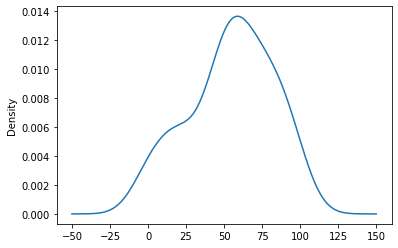

In [72]:
symptomatic["stenosis_left"].plot.kde()

In [36]:
train.age.describe()

count    790.000000
mean      69.741772
std       13.980038
min       23.000000
25%       61.000000
50%       72.000000
75%       80.000000
max      102.000000
Name: age, dtype: float64

In [41]:
valid.symptoms.value_counts(normalize=True)

no     0.610063
yes    0.389937
Name: symptoms, dtype: float64

In [42]:
train.columns

Index(['site', 'patient_ID', 'infarct_side', 'calcification_type_right',
       'calcification_type_left', 'symptoms', 'stroke', 'TIA', 'hypertension',
       'cad', 'smoker_status', 'age', 'gender', 'diabetes', 'hyperlipidemia',
       'stenosis_right', 'stenosis_left', 'prs_either', 'calc_and_lipids',
       'at_least_5_and_stenosis_either'],
      dtype='object')

# OLD

In [7]:
df = pd.read_csv('../input/calcifications.csv')

In [3]:
df["smoker_status"] = df["smoker_status"].apply(lambda v: "no" if v == "no" else "yes") 
df["calcification_type_left"] = df["calcification_type_left"].apply(lambda v: v.replace(" ", ""))
df["calcification_type_right"] = df["calcification_type_right"].apply(lambda v: v.replace(" ", ""))

In [4]:
df.drop("Unnamed: 0", axis=1, errors="ignore", inplace=True)

In [19]:
def positive_rim_sign(left, right):
    """
    True if either left or right has type 5 calcification (positive rim sign)
    """
    return 1 if (left == "Type5" or right == "Type5") else 0

In [20]:
def calc(left, right):
    """
    True if either left or right carotid artery has some type of calcification
    """
    return 0 if left == "Type0" and right == "Type0" else 1

In [21]:
def at_least_4_and_high_stenosis(calc_left, calc_right, sten_left, sten_right):
    """True if calcification type in both sides is at least 4 and stenosis is at least 35 on the left
    and 25 on the right
    """
    return 1 if ((calc_left in ["Type4", "Type5"] and sten_left >= 35) or 
                 (calc_right in ["Type4", "Type5"] and sten_right >= 25)) else 0

In [61]:
df['prs'] = df.apply(lambda x: positive_rim_sign(x['calcification_type_left'], x['calcification_type_right']), axis=1)
df['calcification'] = df.apply(lambda x: calc(x['calcification_type_left'], x['calcification_type_right']), axis=1)
df['at_least_4'] = df.apply(lambda x: at_least_4_and_high_stenosis(x['calcification_type_left'], 
                                                 x['calcification_type_right'],
                                                 x['stenosis_left'],
                                                 x['stenosis_right']), axis=1)

In [34]:
df[(df["symptoms"] == "yes") &
  (df["calcification_type_left"].isin(["Type4", "Type5"])) &
  (df["calcification_type_right"].isin(["Type4", "Type5"]))][["stenosis_left", "stenosis_right"]].median()

stenosis_left     37.500
stenosis_right    29.285
dtype: float64

In [62]:
df["at_least_4"].value_counts()

0    669
1    121
Name: at_least_4, dtype: int64

In [63]:
df.to_csv("../input/calcifications.csv", index=False)

In [114]:
SEED = 1303

In [42]:
df.prs.value_counts()

0    669
1    121
Name: prs, dtype: int64

In [43]:
def positive_rim_sign(left, right):
    """
    True if either left or right has type 5 calcification (positive rim sign)
    """
    return 1 if (left == "Type6" or right == "Type6") else 0

df['prs_bis'] = df.apply(lambda x: positive_rim_sign(x['calcification_type_left'], x['calcification_type_right']), axis=1)

In [44]:
df.prs_bis.value_counts()

0    698
1     92
Name: prs_bis, dtype: int64

# Preprocess German Validation Set

In [ ]:
def calc_bis(left, right):
    """
    True if either left or right carotid artery has some type of calcification
    """
    return 0 if left == "Type1" and right == "Type1" else 1

In [37]:
test = pd.read_excel('../input/EXCEL/test.xlsx')

In [38]:
test["smoker_status"] = test["smoker_status"].apply(lambda v: "no" if v == "no" else "yes") 
test["calcification_type_left"] = test["calcification_type_left"].apply(lambda v: v.replace(" ", ""))
test["calcification_type_right"] = test["calcification_type_right"].apply(lambda v: v.replace(" ", ""))

In [39]:
test.calcification_type_left

0      Type1
1      Type1
2      Type1
3      Type2
4      Type1
       ...  
154    Type3
155    Type2
156    Type5
157    Type1
158    Type6
Name: calcification_type_left, Length: 159, dtype: object

In [35]:
test['prs'] = test.apply(lambda x: positive_rim_sign(x['calcification_type_left'], x['calcification_type_right']), axis=1)
test['calcification'] = test.apply(lambda x: calc(x['calcification_type_left'], x['calcification_type_right']), axis=1)
test['at_least_4'] = test.apply(lambda x: at_least_4_and_high_stenosis(x['calcification_type_left'], 
                                                 x['calcification_type_right'],
                                                 x['stenosis_left'],
                                                 x['stenosis_right']), axis=1)

In [36]:
test.to_csv('../input/test.csv', index=False)

# Preprocessing

In [115]:
TO_DROP = ["site", "patient_ID", "infarct_side", "stroke", "tabulator"]
TO_SCALE = ["age", "stenosis_left", "stenosis_right"]
TO_LABEL_ENCODE = ["TIA", "hypertension", "cad", "gender", "diabetes", "hyperlipidemia", "smoker_status"]
TO_OHE = ["calcification_type_left", "calcification_type_right"]
PREFIXES = ["calcification_left", "calcification_right"]
TARGET = "symptoms"

In [116]:
df = df.drop(TO_DROP, axis=1)

In [117]:
X = df.drop(TARGET, axis=1)
y = df.symptoms
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED, 
                                                    stratify=y)

## Training set

In [8]:
# Label encoding for the target
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [9]:
# Ordinal encoding for categorical binary features
oe = OrdinalEncoder()
X_train[TO_LABEL_ENCODE] = oe.fit_transform(X_train[TO_LABEL_ENCODE]).astype(np.uint8)

In [66]:
# One-hot encoding for categorical features with > 2 levels
X_train = pd.get_dummies(X_train, columns=TO_OHE, prefix=PREFIXES)

In [69]:
# Scale numeric columns
scaler = StandardScaler()
X_train[TO_SCALE] = scaler.fit_transform(X_train[TO_SCALE])

## Test set

In [70]:
y_test = le.transform(y_test)
X_test[TO_LABEL_ENCODE] = oe.transform(X_test[TO_LABEL_ENCODE]).astype(np.uint8)
X_test = pd.get_dummies(X_test, columns=TO_OHE, prefix=PREFIXES)
X_test[TO_SCALE] = scaler.transform(X_test[TO_SCALE])

## Add targets to design matrices

In [76]:
X_train[TARGET] = y_train
X_test[TARGET] = y_test

In [79]:
X_train.to_csv('../input/train.csv', index=False)
X_test.to_csv('../input/test.csv', index=False)

# No one-hot encoding

In [118]:
TO_DROP = ["site", "patient_ID", "infarct_side", "stroke", "tabulator"]
TO_SCALE = ["age", "stenosis_left", "stenosis_right"]
TO_LABEL_ENCODE = ["TIA", "hypertension", "cad", "gender", 
                   "diabetes", "hyperlipidemia", "smoker_status",
                  "calcification_type_left", "calcification_type_right"]
PREFIXES = ["calcification_left", "calcification_right"]
TARGET = "symptoms"

In [119]:
# Label encoding for the target
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [120]:
# Ordinal encoding for categorical binary features
oe = OrdinalEncoder()
X_train[TO_LABEL_ENCODE] = oe.fit_transform(X_train[TO_LABEL_ENCODE]).astype(np.uint8)

In [41]:
# Scale numeric columns
scaler = StandardScaler()
X_train[TO_SCALE] = scaler.fit_transform(X_train[TO_SCALE])
X_test[TO_SCALE] = scaler.transform(X_test[TO_SCALE])

In [121]:
y_test = le.transform(y_test)
X_test[TO_LABEL_ENCODE] = oe.transform(X_test[TO_LABEL_ENCODE]).astype(np.uint8)

In [28]:
X_train[TARGET] = y_train
X_test[TARGET] = y_test
X_train.to_csv('../input/train_no_ohe.csv', index=False)
X_test.to_csv('../input/test_no_ohe.csv', index=False)

## Experiment with feature engineering

In [122]:
def positive_rim_sign(left, right):
    return 1 if (left == 5.0 or right == 5.0) else 0
    
X_train['prs'] = X_train.apply(lambda x: positive_rim_sign(x['calcification_type_left'], x['calcification_type_right']), axis=1)
X_test['prs'] = X_test.apply(lambda x: positive_rim_sign(x['calcification_type_left'], x['calcification_type_right']), axis=1)

In [124]:
def calc(left, right):
    return 0 if left == 0.0 and right == 0.0 else 1
    
X_train['calcification'] = X_train.apply(lambda x: calc(x['calcification_type_left'], x['calcification_type_right']), axis=1)
X_test['calcification'] = X_test.apply(lambda x: calc(x['calcification_type_left'], x['calcification_type_right']), axis=1)

In [127]:
X_train[TARGET] = y_train
X_test[TARGET] = y_test
X_train.to_csv('../input/train_no_ohe_new_feat.csv', index=False)
X_test.to_csv('../input/test_no_ohe_new_feat.csv', index=False)

In [84]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [79]:
params = {
        "fixed": {
            'class_weight': 'balanced',
            'verbose': 0,
            'random_state': 1234,
            'solver': 'liblinear',
            'n_jobs': 1,
            'max_iter': 200
        },
        "space": {
            'penalty': optuna.distributions.CategoricalDistribution(['l1', 'l2']),
            'C': optuna.distributions.UniformDistribution(0.1, 5)
        }
    }

In [80]:
lr = LogisticRegression(**params["fixed"])

In [83]:
inner_cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
outer_cv = RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=1234)

In [85]:
def load_preprocess(which: str = "train"):
    data_path = "../input/train.csv"
    TO_DROP = ["site", "patient_ID", "infarct_side", "stroke"]
    TARGET = "symptoms"
    TO_LABEL_ENCODE = ["TIA", "hypertension", "cad", "gender",
                           "diabetes", "hyperlipidemia", "smoker_status",
                           "prs_either", 'calc_and_lipids', 'at_least_5_and_stenosis_either']
    APPLY_OHE = True
    TO_OHE = ["calcification_type_left", "calcification_type_right"]
    PREFIXES = ["calcification_left", "calcification_right"]
    
    df = pd.read_csv(data_path)
    df = df.drop(TO_DROP, axis=1, errors="ignore")
    X, y = df.drop(TARGET, axis=1), df[TARGET]

    if "smoker_status" in X.columns:
        X["smoker_status"] = X["smoker_status"].apply(lambda v: "no" if v == "no" else "yes")
    if "calcification_type_left" in X.columns:
        X["calcification_type_left"] = X["calcification_type_left"].apply(lambda v: v.replace(" ", ""))
    if "calcification_type_right" in X.columns:
        X["calcification_type_right"] = X["calcification_type_right"].apply(lambda v: v.replace(" ", ""))

    le = LabelEncoder()
    oe = OrdinalEncoder()

    to_encode = TO_LABEL_ENCODE
    if APPLY_OHE:
        X = pd.get_dummies(X, columns=TO_OHE, prefix=PREFIXES)
    else:
        to_encode += TO_OHE

    y = le.fit_transform(y)
    X[to_encode] = oe.fit_transform(X[to_encode]).astype(np.uint8)

    # convert uint8 dtypes to categorical
    cat_cols = X.select_dtypes(include=np.uint8).columns.tolist()
    X[cat_cols] = X[cat_cols].astype("category")

    return X, y

X, y = load_preprocess(which="train")

In [92]:
opt_search = OptunaSearchCV(estimator=lr,
                                    param_distributions=params['space'],
                                    cv=inner_cv,
                                    n_trials=100,
                                    random_state=1234,
                                    refit=True,
                                    scoring="roc_auc",
                                    verbose=10,
                                    n_jobs=1)

opt_search.fit(X, y)

/var/folders/1p/1ck1ggqs5jg_wdfpm41gx6dr0000gn/T/ipykernel_3191/1904576403.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  opt_search = OptunaSearchCV(estimator=lr,
[I 2022-06-06 11:28:32,451] A new study created in memory with name: no-name-f6388564-c4d9-4e51-ab37-d08a2ff5a539
[I 2022-06-06 11:28:32,452] Searching the best hyperparameters using 790 samples...
[I 2022-06-06 11:28:32,486] Trial 0 finished with value: 0.6590226749897458 and parameters: {'penalty': 'l1', 'C': 0.12978128546210912}. Best is trial 0 with value: 0.6590226749897458.
[I 2022-06-06 11:28:32,526] Trial 1 finished with value: 0.6635898132051153 and parameters: {'penalty': 'l1', 'C': 1.2833924324677781}. Best is trial 1 with value: 0.6635898132051153.
[I 2022-06-06 11:28:32,556] Trial 2 finished with value: 0.6603458267100483 and parameters: {'penalty': 'l2', 'C': 4.878083941423857}. Best is trial 1 with value: 0.6635898132051153.
[I 2022

[I 2022-06-06 11:28:33,794] Trial 40 finished with value: 0.6627962597232745 and parameters: {'penalty': 'l2', 'C': 0.3194818831455636}. Best is trial 5 with value: 0.6661203824938001.
[I 2022-06-06 11:28:33,824] Trial 41 finished with value: 0.6625087580628917 and parameters: {'penalty': 'l1', 'C': 0.6525865686869048}. Best is trial 5 with value: 0.6661203824938001.
[I 2022-06-06 11:28:33,851] Trial 42 finished with value: 0.665571379672244 and parameters: {'penalty': 'l1', 'C': 0.37800940368880115}. Best is trial 5 with value: 0.6661203824938001.
[I 2022-06-06 11:28:33,885] Trial 43 finished with value: 0.6632035643856291 and parameters: {'penalty': 'l1', 'C': 0.9450262135701952}. Best is trial 5 with value: 0.6661203824938001.
[I 2022-06-06 11:28:33,909] Trial 44 finished with value: 0.6559894567519555 and parameters: {'penalty': 'l1', 'C': 0.11297859557957668}. Best is trial 5 with value: 0.6661203824938001.
[I 2022-06-06 11:28:33,937] Trial 45 finished with value: 0.66584464948042

[I 2022-06-06 11:28:35,038] Trial 82 finished with value: 0.6632930152258922 and parameters: {'penalty': 'l1', 'C': 0.7184847477382832}. Best is trial 78 with value: 0.6666280855750325.
[I 2022-06-06 11:28:35,068] Trial 83 finished with value: 0.6630315049417369 and parameters: {'penalty': 'l1', 'C': 0.5183076774040706}. Best is trial 78 with value: 0.6666280855750325.
[I 2022-06-06 11:28:35,094] Trial 84 finished with value: 0.6658435547225665 and parameters: {'penalty': 'l1', 'C': 0.3220391114958236}. Best is trial 78 with value: 0.6666280855750325.
[I 2022-06-06 11:28:35,119] Trial 85 finished with value: 0.6652800463593462 and parameters: {'penalty': 'l1', 'C': 0.22501883858302335}. Best is trial 78 with value: 0.6666280855750325.
[I 2022-06-06 11:28:35,147] Trial 86 finished with value: 0.663691844637803 and parameters: {'penalty': 'l1', 'C': 0.4460217032196223}. Best is trial 78 with value: 0.6666280855750325.
[I 2022-06-06 11:28:35,178] Trial 87 finished with value: 0.6626657737

OptunaSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
               estimator=LogisticRegression(class_weight='balanced',
                                            max_iter=200, n_jobs=1,
                                            random_state=1234,
                                            solver='liblinear'),
               n_trials=100,
               param_distributions={'C': UniformDistribution(high=5.0, low=0.1),
                                    'penalty': CategoricalDistribution(choices=('l1', 'l2'))},
               random_state=1234, scoring='roc_auc', verbose=10)